In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data = pd.read_excel('/content/Données_PV.xlsx')

data.head()

,Date/heure,Puissance normalisée PV,Température sol (°C),Vitesse du vent(km/h),Recouvrement nuageux (%),Humidité relative (%),Température apparente (°C),Irradiance globale (W/m²)
0,2014-01-01 00:00:00,0.0,5.8,20.3,100,91,1.5,0
1,2014-01-01 01:00:00,0.0,6.0,20.3,97,93,1.8,0
2,2014-01-01 02:00:00,0.0,6.2,19.1,82,93,2.2,0
3,2014-01-01 03:00:00,0.0,6.2,18.4,22,93,2.3,0
4,2014-01-01 04:00:00,0.0,5.5,19.3,7,94,1.4,0


In [3]:
import pandas as pd

# Supposons que 'data' est votre DataFrame et que 'Time' est déjà au format datetime
# data['Time'] = pd.to_datetime(data['Time']) # Si la conversion est nécessaire

start_date = '2016-01-01'
end_date = '2016-12-31'

# Filtrage des données
prod_2016 = data[(data['Time'] >= start_date) & (data['Time'] <= end_date)].copy()

# prod_2016 contient maintenant toutes les données de production pour l'année 2016.

plt.plot(prod_2016['Time'], prod_2016['Normalized PV power corrected'])
plt.show()

KeyError: 'Time'

Matrice de corrélation

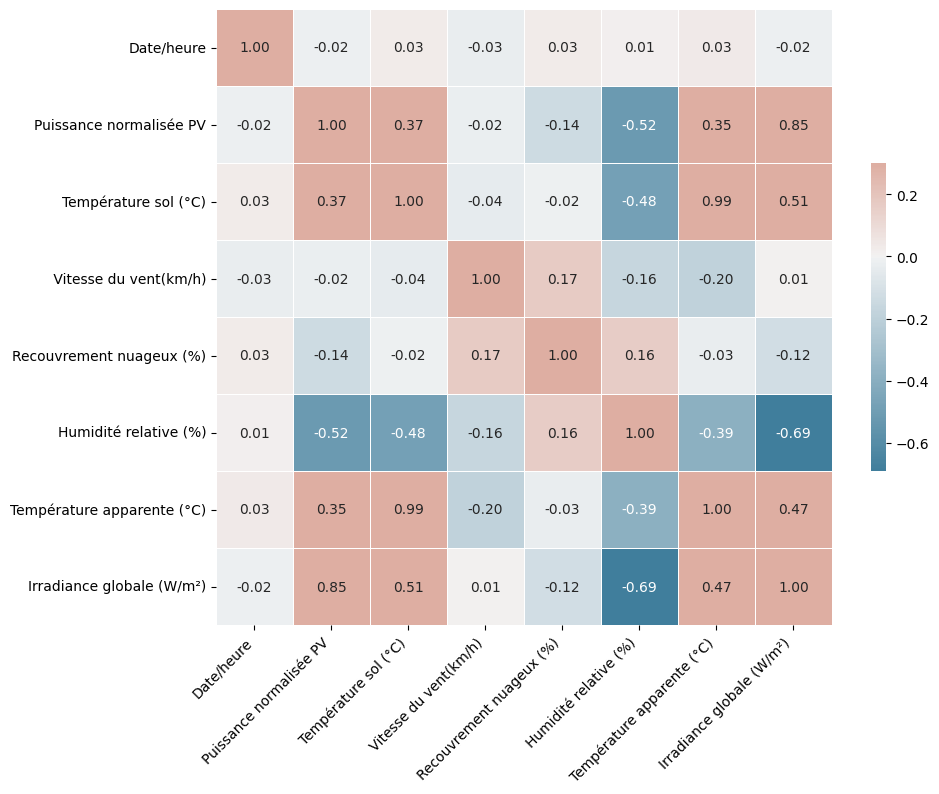

In [12]:
corr = data.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True,
    fmt=".2f"
)

plt.xticks(rotation=45, ha="right")  # labels en diagonale en bas
plt.yticks(rotation=0)

plt.show()

In [ ]:

X = data["PV power irradiance (kW)"].values.reshape(-1, 1)
y = data["PV power (kW)"].values

# Modèle linéaire  : y = k * x
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

k = model.coef_[0]

print("Coefficient k :", k)

KeyError: 'PV power irradiance (kW)'

       count       mean        std  min  25%       50%        75%         max  \
Year                                                                            
2014  8760.0  36.876637  64.157469  0.0  0.0  0.196092  42.953818  281.455984   
2015  8760.0  38.620264  66.796084  0.0  0.0  0.156584  45.051016  290.444092   
2016  8784.0  39.544310  67.270926  0.0  0.0  0.134842  49.542500  287.635069   
2017  8760.0  35.815493  62.643464  0.0  0.0  0.180864  41.222345  277.387190   

      Total Production (kWh)  Mean vs Min %  Production vs Min %  
Year                                                              
2014           323039.341054       2.962808             2.962808  
2015           338313.513424       7.831167             7.831167  
2016           347357.223411      10.411186            10.713682  
2017           313743.718008       0.000000             0.000000  


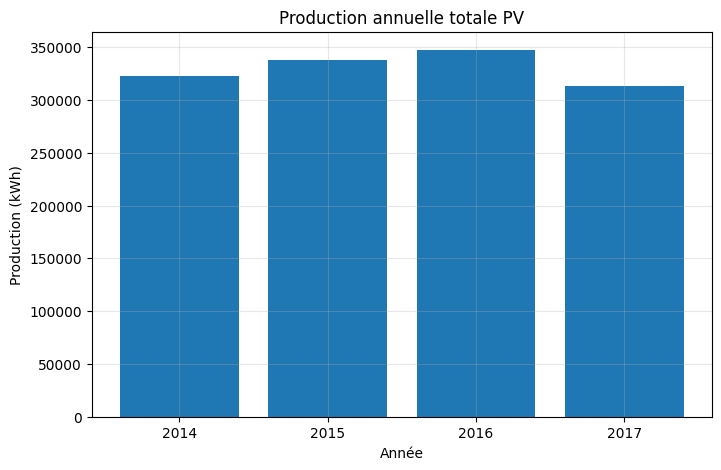

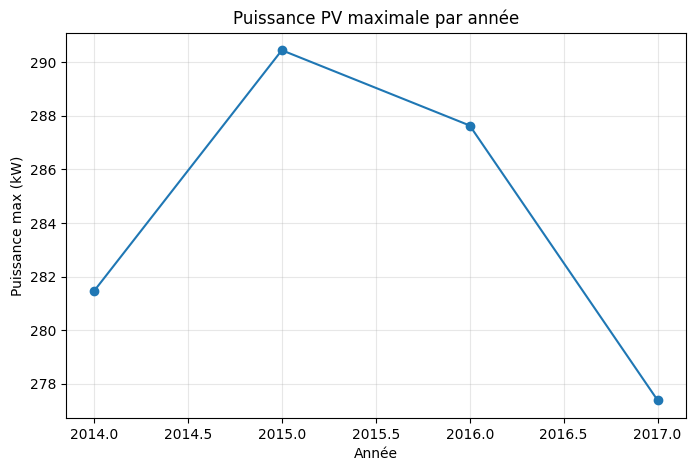

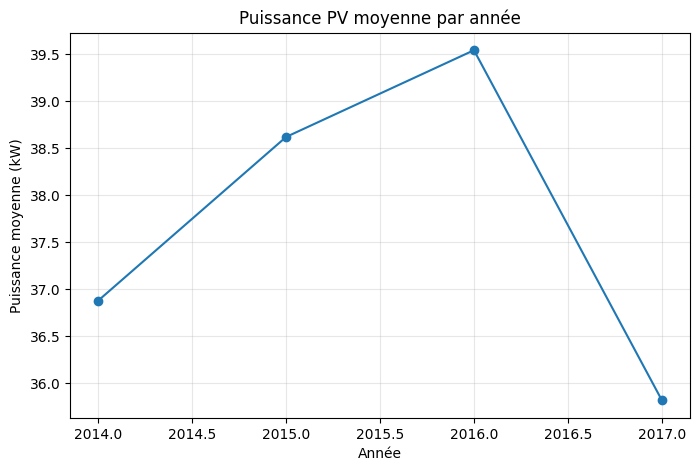

NameError: name 'pv_by_year' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data['Year'] = data['Time'].dt.year
stats = data.groupby('Year')['PV power (kW)'].describe()
stats['Total Production (kWh)'] = data.groupby('Year')['PV power (kW)'].sum()
stats['Mean vs Min %'] = ((stats['mean'] - stats['mean'].min()) / stats['mean'].min()) * 100
stats['Production vs Min %'] = ((stats['Total Production (kWh)'] - stats['Total Production (kWh)'].min()) / stats['Total Production (kWh)'].min()) * 100
pd.set_option('display.max_columns', None)  # pour voir toutes les colonnes
print(stats)

# -------------------------------
# GRAPHS
# -------------------------------

# ----- Graph 1 : Production annuelle (kWh) -----
plt.figure(figsize=(8,5))
plt.bar(stats.index.astype(str), stats['Total Production (kWh)'])
plt.title("Production annuelle totale PV")
plt.xlabel("Année")
plt.ylabel("Production (kWh)")
plt.grid(alpha=0.3)
plt.show()

# ----- Graph 2 : Puissance maximale -----
plt.figure(figsize=(8,5))
plt.plot(stats.index, stats['max'], marker='o')
plt.title("Puissance PV maximale par année")
plt.xlabel("Année")
plt.ylabel("Puissance max (kW)")
plt.grid(alpha=0.3)
plt.show()

# ----- Graph 3 : Puissance moyenne -----
plt.figure(figsize=(8,5))
plt.plot(stats.index, stats['mean'], marker='o')
plt.title("Puissance PV moyenne par année")
plt.xlabel("Année")
plt.ylabel("Puissance moyenne (kW)")
plt.grid(alpha=0.3)
plt.show()

# ----- Graph 4 : Boxplot des distributions -----
plt.figure(figsize=(10,6))
plt.boxplot(
    [pv_by_year[y] for y in pv_by_year.keys()],
    labels=list(pv_by_year.keys())
)
plt.title("Distribution de la puissance PV par année")
plt.ylabel("PV power (kW)")
plt.grid(alpha=0.3)
plt.show()



On remarque que la production annuelle sur les 4 ans varie très peu